In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [58]:
##import python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

READING DATASET FROM FILE

In [59]:
data=pd.read_csv('nigerian_spotify_songs1.csv')

In [60]:
frame=pd.DataFrame(data)
frame.head()

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4


In [61]:
frame.shape

(530, 16)

DATA CLEANING

In [62]:
frame.isnull().sum()

name                0
album               0
artist              0
artist_top_genre    0
release_date        0
length              0
popularity          0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
dtype: int64

In [63]:
frame.dtypes

name                 object
album                object
artist               object
artist_top_genre     object
release_date          int64
length                int64
popularity            int64
danceability        float64
acousticness        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
time_signature        int64
dtype: object

In [64]:
frame.columns

Index(['name', 'album', 'artist', 'artist_top_genre', 'release_date', 'length',
       'popularity', 'danceability', 'acousticness', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'time_signature'],
      dtype='object')

In [65]:
frame.columns.unique()

Index(['name', 'album', 'artist', 'artist_top_genre', 'release_date', 'length',
       'popularity', 'danceability', 'acousticness', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'time_signature'],
      dtype='object')

<Axes: >

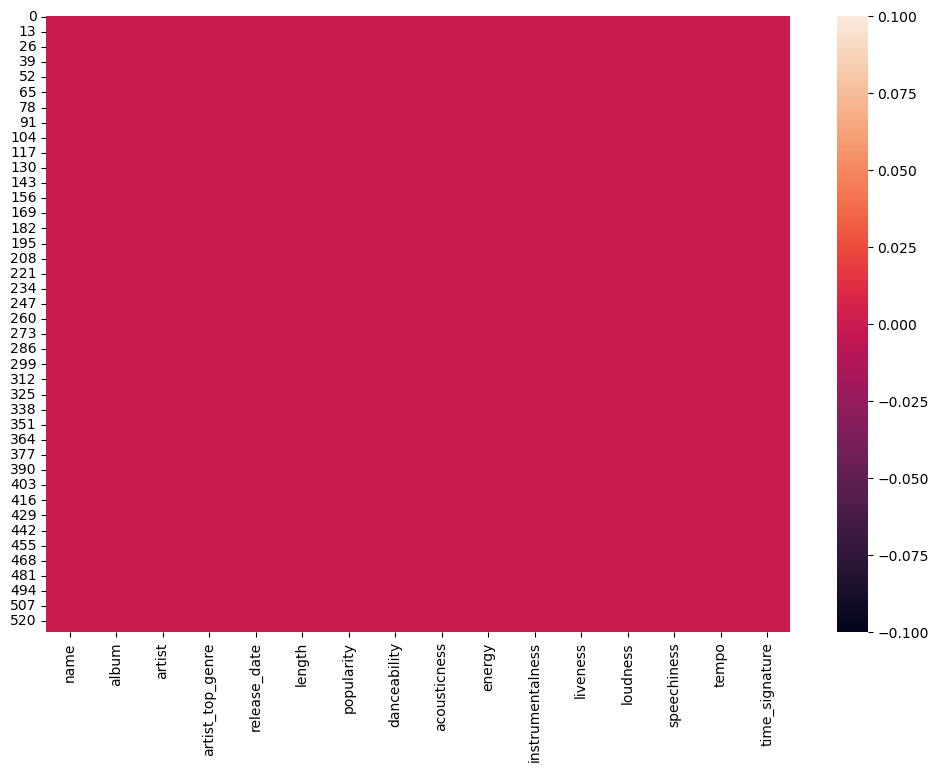

In [66]:
fig=plt.figure(figsize=(12,8))
sns.heatmap(frame.isnull())

Text(0.5, 1.0, 'Top Genres')

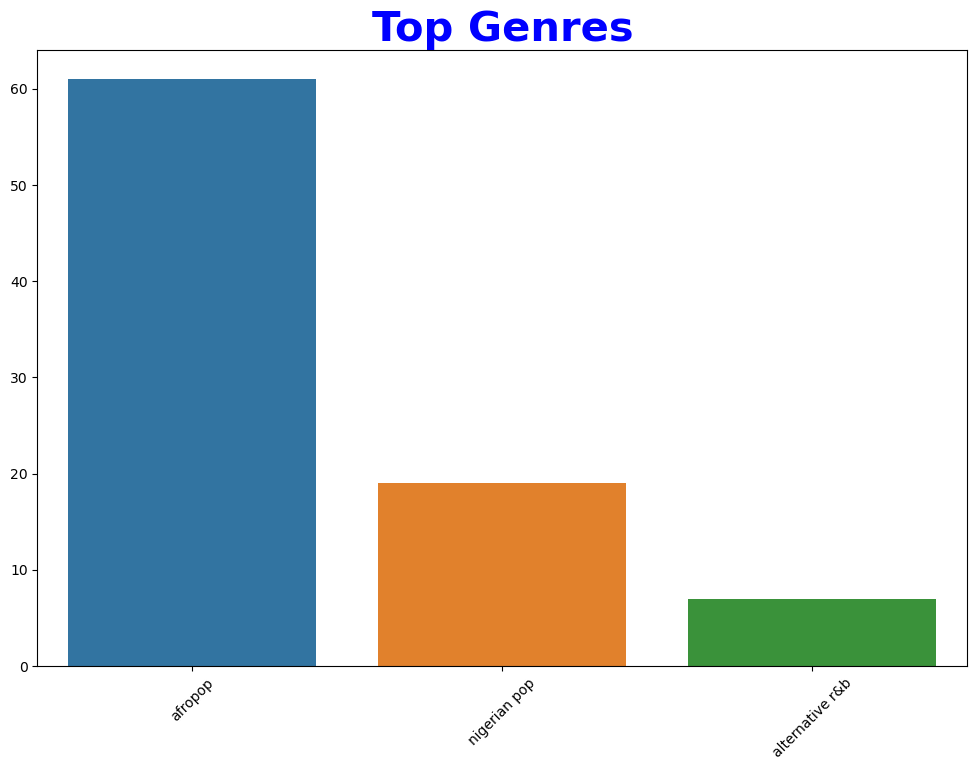

In [67]:
frame=frame[(frame['artist_top_genre']=='afropop')|(frame['artist_top_genre']=='alternative r&b')| 
                   (frame['artist_top_genre']=='nigerian pop')]
frame=frame[(frame['popularity']>0)]
top_value=frame['artist_top_genre'].value_counts()
fig=plt.figure(figsize = (12, 8))
sns.barplot(x=top_value.index, y=top_value.values)
plt.xticks(rotation=45)
plt.title('Top Genres', color='blue', fontsize=30, fontweight='bold')

Apply Standard Scaler..

Choose several columns with similar ranges. Make sure to include the artist_top_genre column to keep our genres straight.

In [340]:
lb_en=LabelEncoder()
x=frame.loc[:, ('artist_top_genre','liveness','instrumentalness','speechiness','tempo')]
y=frame['artist_top_genre']
x['artist_top_genre']=lb_en.fit_transform(x['artist_top_genre'])
y=lb_en.transform(y)

Apply KMeans Algorithm on Dataset.

In [348]:
km_model=KMeans(n_clusters = 2, random_state = 0)
km_model.fit(x)

# Predict the cluster for each data point..
y_pred_kmeans=km_model.predict(x)
y_pred_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

Accuracy of model

In [350]:
from sklearn import metrics
score=metrics.silhouette_score(x, y_pred_kmeans)
score

0.7524624151431238

BUILDING THE MODEL

In [351]:
wcss_array = []

for i in range(1, 11):
    kmeans_model=KMeans(n_clusters=i, init='k-means++', random_state=35)
    kmeans_model.fit(x)
    wcss_array.append(kmeans_model.inertia_)

Create Elbow Method

Use that model to decide, using the Elbow Method, the best number of clusters to build

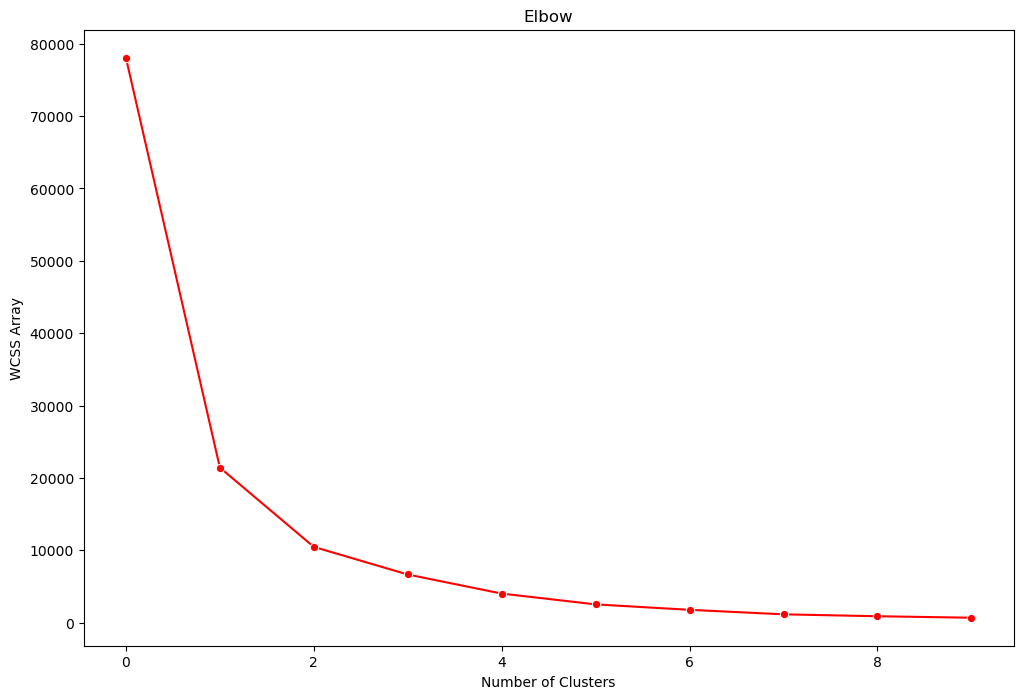

In [352]:
fig = plt.figure(figsize = (12, 8))
sns.lineplot(wcss_array, marker = 'o', color = 'red')
plt.title('Elbow')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Array')
plt.show()

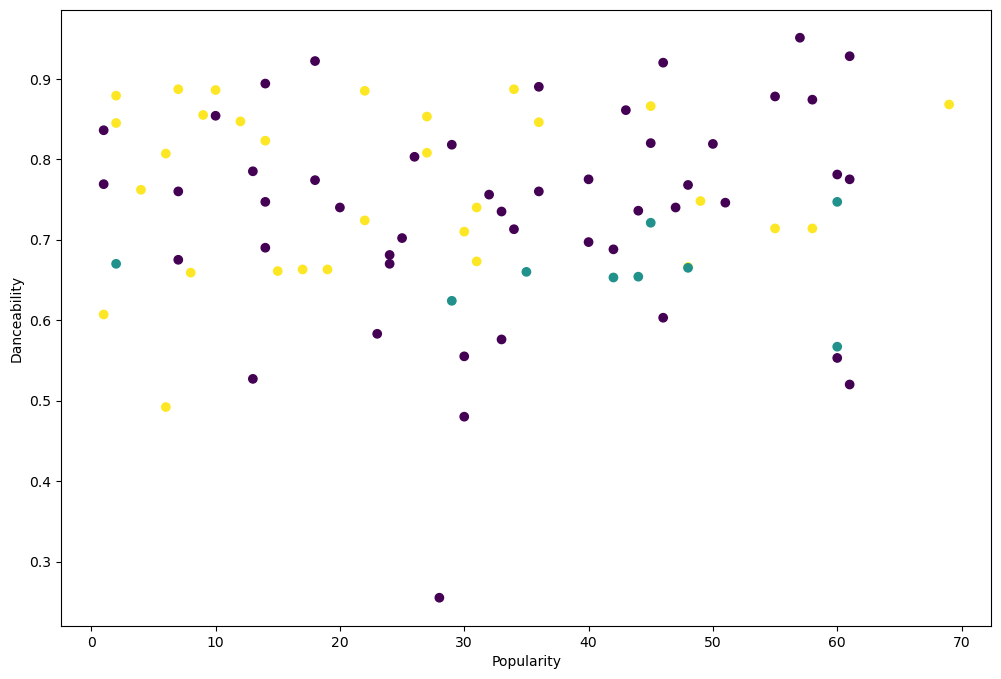

In [353]:
kmeans_model = KMeans(n_clusters = 3)
kmeans_model.fit(x)
km_y_pred = kmeans_model.predict(x)
fig = plt.figure(figsize = (12, 8))
plt.scatter(frame['popularity'], frame['danceability'], c = km_y_pred)
plt.xlabel('Popularity')
plt.ylabel('Danceability')
plt.show()

In [343]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score = davies_bouldin_score(x, y_pred_kmeans)

In [344]:
davies_bouldin_score

0.383944042731408

In [345]:
from sklearn.metrics import calinski_harabasz_score
calinksi_score = calinski_harabasz_score(x, y_pred_kmeans)
calinksi_score

224.50933469720204